## EDA

In [464]:
from __future__ import division
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import cross_validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import re
from HTMLParser import HTMLParser
import datetime
import cPickle as pickle

from bs4 import BeautifulSoup
from bs4 import UnicodeDammit
from collections import defaultdict
from datetime import datetime
import os
import sys
import pdb
import re
import string

In [496]:
# Files that contain extracted names and summaries
sample10_file = '/Users/lekha/galvanize/capstone/projectRiley/data/sample10/out.txt'
sample1000_file = '/Users/lekha/galvanize/capstone/projectRiley/data/out1000.txt'
all_file = '/Users/lekha/galvanize/capstone/projectRiley/data/outall.txt'

holyoke_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/outholyoke.txt'
utaustin_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/oututaustin.txt'
vassar_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/outvassar.txt'
wellesley_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/outwellesley.txt'
caltech_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/outcaltech.txt'
gatech_raw = '/Users/lekha/galvanize/capstone/projectRiley/data/outgatech.txt'

In [467]:
fname = '/Users/lekha/galvanize/capstone/projectRiley/data/sample1/lydia-charles-13740793.html'

In [468]:
with open(fname) as f:
    soup = BeautifulSoup(f, 'html.parser')

In [487]:
#print (soup.prettify())

#soup.find(class_='fn', id='name').string

soup.find(class_='profile-section', id='summary')

<section class="profile-section" id="summary"><h3 class="title">Summary</h3><div class="description"><p>Specialties:<br>Cultural asset(s) incorporation<br>Neighborhood/localized economic development<br>Building resilience to recurring community challenges<br><br>Over fifteen years of applied doctoral work in cultural studies to guide economic and cultural development projects throughout the United States. Expert in practical solutions for organizations, neighborhoods, towns, and cities striving to be competitive, viable, and sustainable in the current economy, while maintaining their unique character, has been utilized in collaboration with a variety of clients, public and private.</br></br></br></br></br></p></div></section>

In [495]:
for x in  soup.find(class_='profile-section', id='summary'):
    print x.get_text()

Summary
Specialties:Cultural asset(s) incorporationNeighborhood/localized economic developmentBuilding resilience to recurring community challengesOver fifteen years of applied doctoral work in cultural studies to guide economic and cultural development projects throughout the United States. Expert in practical solutions for organizations, neighborhoods, towns, and cities striving to be competitive, viable, and sustainable in the current economy, while maintaining their unique character, has been utilized in collaboration with a variety of clients, public and private.


In [210]:
pwd

u'/Users/lekha/galvanize/capstone/projectRiley/code'

In [710]:
cols = defaultdict(list)
num_rows = 0
with open(all_file) as f:
    for line in f:
        num_rows += 1
        n = line.split('||')
        cols['full_name'].append(n[0])
        cols['summary'].append(n[1])
        cols['html'].append(n[2])

df = pd.DataFrame(data=cols, index = np.arange(num_rows))

In [577]:
df.head()

,full_name,html,summary
0,missing,./2015-12-25-ut-austin/.html\n,missing
1,aakriti srikanth,./2015-12-25-ut-austin/aakritisrikanth.html\n,summaryproduct management strategy business d...
2,aaron oege,./2015-12-25-ut-austin/aaron-droege-9329b29b.h...,missing
3,aaron morden,./2015-12-25-ut-austin/aaron-morden-92985690.h...,missing
4,amber davis,./2015-12-25-ut-austin/abdavis22.html\n,missing


In [711]:
# add a counter of ones for doing some data analysis
df['counter'] = np.ones(len(df))

In [712]:
df['source'] = 'uwash'

In [713]:
df.head()

,full_name,html,summary,counter,source
0,missing,./.html\n,missing,1,uwash
1,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,1,uwash
2,regina nunn,./05111108.html\n,missing,1,uwash
3,michael mayes,./120394.html\n,a detail and results oriented professional wit...,1,uwash
4,missing,./143418.html\n,missing,1,uwash


In [714]:
# debugging nonetype strings. Keeping the code since I seem to need it often
temp = df['full_name'].apply(lambda x: x.split())
print len(temp)
lens = []
for x in temp:
    lens.append(len(x))
    
print set(lens)

nplens = np.array(lens)
print np.where(nplens == 0)


18192
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15])
(array([ 8568,  9638, 10864, 14465, 16045, 17267, 17294, 18146]),)


In [715]:
df.drop(df.index[[8568,9638, 10864, 14465,16045, 17267,17294,18146]], inplace=True)

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2997
Data columns (total 5 columns):
full_name    2997 non-null object
html         2997 non-null object
summary      2997 non-null object
counter      2997 non-null float64
source       2997 non-null object
dtypes: float64(1), object(4)
memory usage: 140.5+ KB


In [716]:
# Add new column for first_name
df['first_name'] = df['full_name'].apply(lambda x: x.split()[0])

In [717]:
df = df[df['first_name'] != 'missing']

In [718]:
df[df['first_name'] == 'unicode-only']

,full_name,html,summary,counter,source,first_name
141,unicode-only,./aceeca1.html\n,yaos award winning prize in iiis tsinghua uni...,1,uwash,unicode-only
10765,unicode-only,./lionelxy.html\n,missing,1,uwash,unicode-only
18008,unicode-only,./yaxuanli.html\n,missing,1,uwash,unicode-only
18154,unicode-only,./zhenhuanren.html\n,missing,1,uwash,unicode-only


In [719]:
df = df[df['first_name'] != 'unicode-only']

In [720]:
df[df['first_name'].map(len) <= 1]

,full_name,html,summary,counter,source,first_name
95,h arad abadi,./abadih.html\n,missing,1,uwash,h
126,a b jefferson ph d,./abjefferson.html\n,missing,1,uwash,a
142,a c powell,./acepowell.html\n,seasoned operations professional turned profes...,1,uwash,a
412,g alan reitsch,./alanreitsch.html\n,\tdedicated and accomplished professional with...,1,uwash,g
1300,m mccarthy,./annonaflow.html\n,annonaflow is a web based business supplying l...,1,uwash,m
1504,a sean bailey cfp,./aseanbailey.html\n,extensive experience with washington state dep...,1,uwash,a
2189,r branden harper,./brandenharper.html\n,ten year career in sales and marketing financ...,1,uwash,r
2499,b tausch lapora,./btauschlapora.html\n,educator writer and attorney offering signific...,1,uwash,b
2616,c amorosi,./camorosi.html\n,publicationssupalo c mallouk t rankel l amoros...,1,uwash,c
2841,c benjamin cooper,./cbenjamincooper.html\n,attorney licensed to practice in ohio active v...,1,uwash,c


In [675]:
df.set_value(242, 'first_name', 'leo')
df.set_value(346, 'first_name', 'bruce')
df.set_value(491, 'first_name', 'mike')
df.set_value(508, 'first_name', 'randal')
df.set_value(683, 'first_name', 'joseph')
df.set_value(2412, 'first_name', 'reef')

,full_name,html,summary,counter,source,first_name
1,anew crawford,./aacrawford123.html\n,missing,1,caltech,anew
2,girish aakalu phd,./aakalu.html\n,summarylife sciences professional with broad c...,1,caltech,girish
3,aaron babcock,./aaron-babcock-91a96356.html\n,missing,1,caltech,aaron
4,aaron s rury,./aaron-s-rury-55b2882a.html\n,summaryoptical and chemical physicist with ext...,1,caltech,aaron
5,abby goldsmith,./abbygoldsmith.html\n,summaryas an art director at wayforward techno...,1,caltech,abby
6,abdul a tariq,./abdultariq.html\n,missing,1,caltech,abdul
7,abe ankumah,./abeankumah.html\n,missing,1,caltech,abe
8,abhir kulkarni,./abhir-kulkarni-50755626.html\n,missing,1,caltech,abhir
9,abhiram moturi,./abhirammoturi.html\n,missing,1,caltech,abhiram
10,abhishek kandoi,./abhishekkandoi.html\n,missing,1,caltech,abhishek


In [721]:
df = df[df['first_name'].map(len) > 1]

In [722]:
len(df)

18047

In [678]:
# Holyoke = 3184 names
# UT Austin = 996 names
# Vassar = 2436 names
# Wellesley = 2985 names
# Caltech = 2530 names
# Gatech =  1258 names
# UWash = 18047 names

## Gender Prediction using First Names

In [723]:
def gender_features(word):
    '''
    Returns the following features given a word:
    - name
    - last letter
    - last 2 letters
    - boolean if last letter is vowel
    '''
    return {'name': word, 'last_letter': word[-1], 'last_2_letters': word[-2:], 'last_is_vowel': (word[-1] in 'aeiou')}

In [724]:
def force_names(name, gender):
    females = ['aileen','jennifer', 'alyson', 'trinity', 'emily', 'mary', 'lillian', 'susannah', 'sydney', 'abby',
               'nancy', 'betty','bridget', 'elizabeth','brittany', 'april', 'casey', 'deb', 'dorothy','eleanor', 'erinn',
               'alexis','kimberly', 'lauren', 'sarah', 'heather', 'susan', 'amy', 'kim', 'haley', 'hilary',
              'karen', 'erin', 'rachel','ashley','megan', 'kelly', 'ingrid', 'jiamin', 'ann',
              'kymberly', 'aiden', 'elisabeth','marylou', 'harriet', 'apryl','meg', 'cindy', 'carmen',
              'joann', 'becky', 'meredyth', 'sheryl', 'tammy', 'rupal', 'maryann', 'carolynn', 'allison', 'edith',
              'rosemary', 'judith', 'sharon', 'pinar', 'stacy', 'stacey', 'helen', 'ginger', 'gretchen', 
              'jenifer', 'lois', 'meghan', 'holly', 'maureen', 'shabnam', 'karin','kat','kristen', 'kris', 'lily',
               'lucy', 'meagan', 'pam', 'colleen', 'kalleen', 'kaleen', 'hannah', 'tasneem', 'lindsay', 'margot', 
               'doris', 'shelley','judy', 'courtney', 'brittanny','hillary', 'shirley', 'angel','anu', 'tracy', 
               'beth', 'sonal', 'amber', 'sherry', 'kirsten', 'caitlin', 'carol', 'cathy', 'leah', 'liz', 'ellen',
              'isabel', 'lindsey', 'ariel', 'jenny','molly', 'robin', 'gail', 'jen','joan', 'kathy', 'kelsey', 
               'meredith', 'miriam', 'morgan','ngan', 'ruth', 'anew', 'auey', 'beverly', 'cheryl', 'eileen', 'janet',
               'jean', 'juliet', 'margaret', 'wendy', 'frances', 'jill', 'joy', 'tiffany', 'bethany', 'carly', 'iris', 
              'kelley', 'meaghan', 'melody', 'marion', 'libby', 'laurel']
    males = ['dave','mike', 'steve','kyle', 'aditya', 'ali', 'andre', 'joe', 'joshua',
            'gopi', 'krishna', 'robbie', 'jake', 'jorge', 'ravi', 'zakaria','nikolai','ronnie', 'royce', 'vance',
            'bruce', 'franklyn', 'mustafa', 'charlie', 'keshava', 'jose']
    if name in females:
        return 'female'
    if name in males:
        return 'male'
    return gender



In [725]:
import nltk
from nltk.corpus import names

def gender_classifier(first_name):
    # 7944 labeled names from nltk corpus
    labeled_names = ([(name, 'male') for name in names.words('male.txt')] +[(name, 'female') for name in names.words('female.txt')])

    # nltk's NaiveBayesClassifier takes featuresets to train that is a tuple of (features_dict, label)
    featuresets_train = [(gender_features(name), gender) for (name, gender) in labeled_names]
    classifier = nltk.NaiveBayesClassifier.train(featuresets_train)
    
    # get the features of the set to be classified
    name_features = gender_features(first_name)
    g = classifier.classify(name_features)

    g = force_names(first_name, g)
    
    return g


df['gender'] = df['first_name'].apply(lambda x: gender_classifier(x))

In [726]:
print df.gender.value_counts()
df['first_name'].nunique()
df_agg = df.groupby(['gender','first_name']).agg({'counter':sum})

#group by the first level of the index
g = df_agg['counter'].groupby(level=0, group_keys=False)

# sort by the count of the first names
print g.nlargest(50)

male      10359
female     7688
Name: gender, dtype: int64
gender  first_name
female  jennifer      154
        sarah         123
        jessica       117
        lisa           88
        michelle       81
        elizabeth      79
        emily          79
        mary           79
        laura          77
        stephanie      74
        amy            69
        susan          65
        julie          64
        erin           62
        rachel         61
        amanda         60
        ashley         56
        heather        56
        megan          56
        nicole         54
        rebecca        54
        kelly          51
        lauren         50
        karen          49
        anna           48
        sara           48
        christine      46
        katie          46
        andrea         43
        christina      43
                     ... 
male    matt           79
        richard        77
        alex           72
        dan            72
        jona

In [727]:
# Write DF with gender to a text file
df.to_csv('../data/withgender_uwash.txt', sep="|")

In [728]:
females = df[df['gender'] == 'female']
males = df[df['gender'] == 'male']

In [729]:
females['first_name'].nunique()

1913

In [730]:
males['first_name'].nunique()

2332

In [463]:
set(males['first_name'])

{'eivind',
 'trenton',
 'andry',
 'andre',
 'francesco',
 'roosvelt',
 'aswin',
 'pedro',
 'pasang',
 'marcos',
 'paris',
 'kentaro',
 'edward',
 'yichao',
 'regan',
 'applied',
 'itzam',
 'every',
 'jack',
 'jacob',
 'stevanus',
 'raymon',
 'akash',
 'charmin',
 'hossein',
 'shaughn',
 'sxean',
 'venus',
 'sachin',
 'eileen',
 'gongguo',
 'chet',
 'abdulrahman',
 'hanah',
 'codin',
 'ashkaan',
 'arwen',
 'lian',
 'kymber',
 'gorman',
 'chen',
 'melvin',
 'ryland',
 'yitung',
 'seunghyun',
 'ruben',
 'shishir',
 'ned',
 'naarah',
 'neb',
 'pawel',
 'ayman',
 'liah',
 'cheng',
 'sheffield',
 'liberto',
 'ghungru',
 'mrityunjay',
 'jayson',
 'athar',
 'zach',
 'avery',
 'mel',
 'drew',
 'beck',
 'jarrod',
 'brooks',
 'bogdan',
 'gerry',
 'michal',
 'ansgar',
 'wenyu',
 'leland',
 'ty',
 'sangbin',
 'karim',
 'karin',
 'lyubov',
 'joshua',
 'kieran',
 'bry',
 'guangtong',
 'kyryl',
 'shun',
 'zijing',
 'yanyan',
 'xuyao',
 'anupam',
 'nikolaos',
 'ambreen',
 'juemin',
 'robertson',
 'tk',

In [427]:
# Verification Cell for Classification Algorithm
train_set, test_set = featuresets[600:], featuresets[:500]
print classifier.classify(gender_features('rahul'))
print classifier.classify(gender_features('Trinity'))
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)

male
male
0.802
Most Informative Features
          last_2_letters = u'na'          female : male   =    106.4 : 1.0
          last_2_letters = u'la'          female : male   =     80.2 : 1.0
          last_2_letters = u'ia'          female : male   =     42.4 : 1.0
          last_2_letters = u'sa'          female : male   =     37.8 : 1.0
             last_letter = u'a'           female : male   =     35.4 : 1.0


In [ ]:
# unique names in females and males
print (females_all['first_name'].nunique())
print (males_all['first_name'].nunique())

In [58]:
x = zip(fnames, gender_fnames1)
with open('gender1000.txt', 'w') as f:
    for line in x:
        name = line[0]
        g = line[1]
        nameg = name + "," + g + "\n"
        f.write(nameg)
        #f.write("\n")

In [160]:
letter_freq = df.last_letter.value_counts()
letter_freq.sort_values(ascending=False, inplace=True)


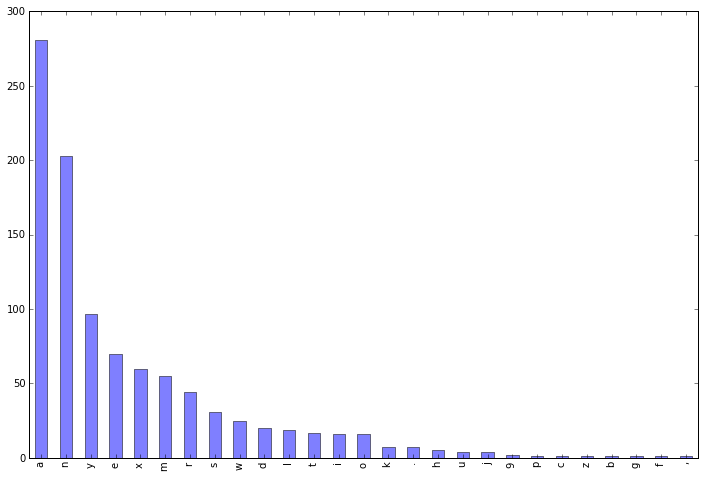

In [161]:
# Plot one of the features for gender prediction: last letter
fig, ax = plt.subplots()
letter_freq.plot(ax=ax, kind='bar', alpha = 0.5, figsize=(12,8))

In [550]:
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]

In [551]:
type(male_names)

list

In [554]:
common_names = list(set(male_names) & set(female_names))

In [555]:
len(common_names)

365

In [556]:
len(male_names)

2943

In [557]:
len(female_names)

5001

In [575]:
common_names

[u'Lonnie',
 u'Van',
 u'Val',
 u'Shelby',
 u'Darby',
 u'Ronnie',
 u'Ikey',
 u'Casey',
 u'Clemmie',
 u'Timmie',
 u'Ollie',
 u'Darryl',
 u'Jaime',
 u'Laurie',
 u'Tallie',
 u'Hannibal',
 u'Sonnie',
 u'Gayle',
 u'Toby',
 u'Tobe',
 u'Chrissy',
 u'Mattie',
 u'George',
 u'Sandy',
 u'Rey',
 u'Claude',
 u'Christie',
 u'Eddy',
 u'Pennie',
 u'Bert',
 u'Wallie',
 u'Timmy',
 u'Tracie',
 u'Wallis',
 u'Lind',
 u'Pattie',
 u'Ronny',
 u'Marty',
 u'Bobbie',
 u'Benny',
 u'Emmy',
 u'Patty',
 u'Angie',
 u'Dominique',
 u'Lorne',
 u'Shea',
 u'Clare',
 u'Bennie',
 u'Tommie',
 u'Ginger',
 u'Elisha',
 u'Shannon',
 u'Tabbie',
 u'Devin',
 u'Blake',
 u'Ariel',
 u'Abbey',
 u'Dale',
 u'Merle',
 u'Allyn',
 u'Rickie',
 u'Tammy',
 u'Wally',
 u'Cory',
 u'Lane',
 u'Gus',
 u'Claire',
 u'Lanny',
 u'Muffin',
 u'Lorrie',
 u'Clair',
 u'Lin',
 u'Jerry',
 u'Jermaine',
 u'Jere',
 u'Dell',
 u'Stacy',
 u'Millicent',
 u'Jordan',
 u'Gail',
 u'Gretchen',
 u'Alexis',
 u'Juanita',
 u'Meade',
 u'Kelly',
 u'Martie',
 u'Joey',
 u'Ali',
 u